# **Lab 2 Assignment - Applied AI**

## Aneesh Krishna Ramesh - 8914620

### **PART-A** - Classification

In [121]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plot

# sklearn dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report as cReport, accuracy_score as aS

# Naive baye's, Multinomial Naive Baye's, SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [122]:
# display(dflab2)
dflab2 = pd.read_csv('.\\..\\..\\practical_labs\\datasets\\Lab_2\\Lab2_dataset.csv')

dflab2 = dflab2.rename(columns={'label':'Status','text':'Message','label_num':'LabelNum','Unnamed: 0':'Count'})
cVectorizer = CountVectorizer(encoding='utf-8',stop_words='english',binary=True)
display(cVectorizer)

dflab2_x = dflab2['Message']
dflab2_y = dflab2['LabelNum']

CountVectorizer(binary=True, stop_words='english')

In [123]:
X_train, X_test, y_train, y_test = train_test_split(dflab2_x, dflab2_y, test_size=0.2, random_state=42)

XTrainFitVec = cVectorizer.fit_transform(X_train)
XTestVect = cVectorizer.transform(X_test)

#### ***Classification Algorithms***

In [124]:
classifier = GaussianNB()
classifier.fit(XTrainFitVec.toarray(), y_train)
prediction = classifier.predict(XTestVect.toarray())
accurancyGNB = aS(y_test, prediction)
print("Gaussian Naive Baye's Report : \n",cReport(y_test, prediction))

classifier = MultinomialNB()
classifier.fit(XTrainFitVec, y_train)
prediction = classifier.predict(XTestVect)
accurancyMNB = aS(y_test, prediction)
print("\n Multinomial Naive Baye's Report : \n",cReport(y_test, prediction))


Gaussian Naive Baye's Report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       742
           1       0.97      0.87      0.91       293

    accuracy                           0.95      1035
   macro avg       0.96      0.93      0.94      1035
weighted avg       0.95      0.95      0.95      1035


 Multinomial Naive Baye's Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       742
           1       0.97      0.93      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [125]:
svc_classifier = SVC()
svc_classifier.fit(XTrainFitVec, y_train)
predictionSVC = svc_classifier.predict(XTestVect)
print("\n SVC Naive Baye's Report : \n",cReport(y_test, predictionSVC))

accurancySVC = aS(y_test, predictionSVC)


 SVC Naive Baye's Report : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       742
           1       0.91      0.99      0.95       293

    accuracy                           0.97      1035
   macro avg       0.95      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



#### ***The accuracy of the models***

In [126]:
print("GNB Accuracy Report ::: ",round(accurancyGNB*100, 2),"%")
print("MNB Accuracy Report ::: ",round(accurancyMNB*100, 2),"%")
print("SVC Accuracy Report ::: ",round(accurancyMNB*100, 2),"%")

GNB Accuracy Report :::  95.36 %
MNB Accuracy Report :::  97.29 %
SVC Accuracy Report :::  97.29 %


*This suggests that the MNB model and SVC model have similar results whereas the Gaussian Naive Baye's model is the least accuracy compared to the others at 95.36%. The most accurate is either **SVC** or **Multinomial Naive Baye's** with 97.29%*

# **Part B** - Outliers

In [127]:
dfAB = pd.read_csv('.\..\..\\practical_labs\\datasets\\Lab_2\\AB_NYC_2019.csv')
display(dfAB.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


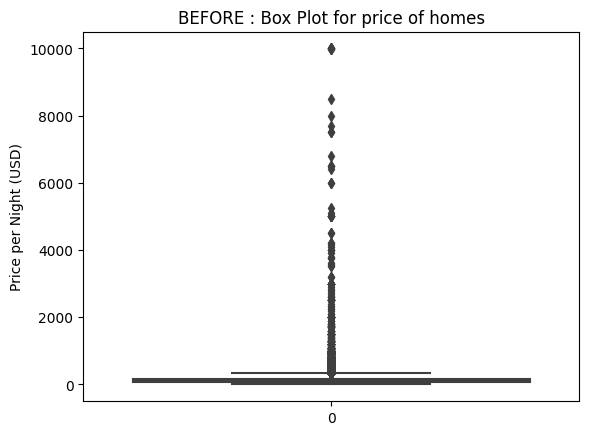

In [128]:
sb.boxplot(dfAB['price'])
plot.ylabel('Price per Night (USD)')
plot.title('BEFORE : Box Plot for price of homes')
plot.show()

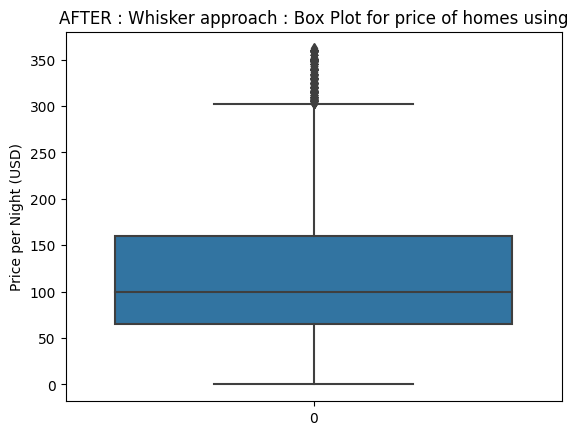

In [129]:
# Whisker approach
Q1 = dfAB['price'].quantile(0.10)
Q3 = dfAB['price'].quantile(0.75)
low = Q1 - 1.5 * (Q3 - Q1)
high = Q3 + 1.5 * (Q3 - Q1)
dfFilter = dfAB[(dfAB['price'] >= low) & (dfAB['price'] <= high)]

sb.boxplot(dfFilter['price'])
plot.ylabel('Price per Night (USD)')
plot.title('AFTER : Whisker approach : Box Plot for price of homes using')
plot.show()

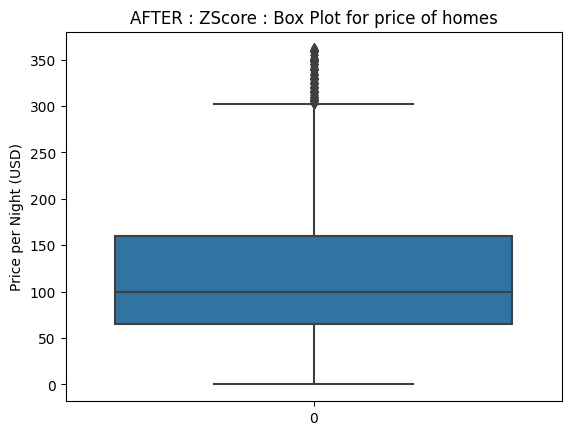

In [130]:
# Z-score approach 
mean = dfAB['price'].mean()
stdDeviation = dfAB['price'].std()
dfAB['zScore'] = (dfAB['price'] - mean) / stdDeviation
dfFilterZ = dfAB[np.abs(dfAB['zScore']) <= 2] # Threshold is 2 

sb.boxplot(dfFilter['price'])
plot.ylabel('Price per Night (USD)')
plot.title('AFTER : ZScore : Box Plot for price of homes')
plot.show()

In [131]:
# Comparison of data frames 
print('Data frame default : ',dfAB.shape)
print('Data frame Whisker approach : ',dfFilter.shape)
print('Data frame ZScore approach : ',dfFilterZ.shape)

Data frame default :  (48895, 17)
Data frame Whisker approach :  (46499, 16)
Data frame ZScore approach :  (48128, 17)


### *The Z score approach seems to be the better approach as the outliers have been handled while not removing many entries from the datasets*  